In [1]:
import anndata
import numpy
import os
import pandas
import scanpy
from matplotlib import pyplot

/usr/lib/python3/dist-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
%matplotlib inline

In [3]:
from woldrnaseq import gtfcache

In [4]:
m4 = gtfcache.load_gtf_cache(os.path.expanduser('~/proj/genome/mm10-M4-male/mm10-M4-male.h5'))

In [5]:
scanpy.settings.verbosity = 3

In [6]:
quantification='FPKM'

In [7]:
ad = scanpy.read_h5ad('paper_analysis_vdir/C1_mouse_forelimb_{}.h5ad'.format(quantification))

In [8]:
ad.obs['gene_id'].head()

index
10000    10000
10001    10001
10002    10002
10003    10003
10004    10004
Name: gene_id, dtype: object

In [9]:
set(m4['gene_type'])

{'3prime_overlapping_ncrna',
 'IG_C_gene',
 'IG_C_pseudogene',
 'IG_D_gene',
 'IG_D_pseudogene',
 'IG_J_gene',
 'IG_LV_gene',
 'IG_V_gene',
 'IG_V_pseudogene',
 'Mt_rRNA',
 'Mt_tRNA',
 'TEC',
 'TR_C_gene',
 'TR_D_gene',
 'TR_J_gene',
 'TR_J_pseudogene',
 'TR_V_gene',
 'TR_V_pseudogene',
 'antisense',
 'lincRNA',
 'miRNA',
 'misc_RNA',
 nan,
 'polymorphic_pseudogene',
 'processed_pseudogene',
 'processed_transcript',
 'protein_coding',
 'pseudogene',
 'rRNA',
 'sense_intronic',
 'sense_overlapping',
 'snRNA',
 'snoRNA',
 'tRNAscan',
 'transcribed_processed_pseudogene',
 'transcribed_unprocessed_pseudogene',
 'translated_processed_pseudogene',
 'translated_unprocessed_pseudogene',
 'unitary_pseudogene',
 'unprocessed_pseudogene'}

In [10]:
mt = m4[(m4['type'] == 'gene') & (m4['gene_name'].apply(lambda x: str(x).startswith('mt-')))][['gene_id', 'gene_name']]
mt

,gene_id,gene_name
1490858,ENSMUSG00000064336.1,mt-Tf
1490861,ENSMUSG00000064337.1,mt-Rnr1
1490864,ENSMUSG00000064338.1,mt-Tv
1490867,ENSMUSG00000064339.1,mt-Rnr2
1490870,ENSMUSG00000064340.1,mt-Tl1
1490873,ENSMUSG00000064341.1,mt-Nd1
1490879,ENSMUSG00000064342.1,mt-Ti
1490882,ENSMUSG00000064343.1,mt-Tq
1490885,ENSMUSG00000064344.1,mt-Tm
1490888,ENSMUSG00000064345.1,mt-Nd2


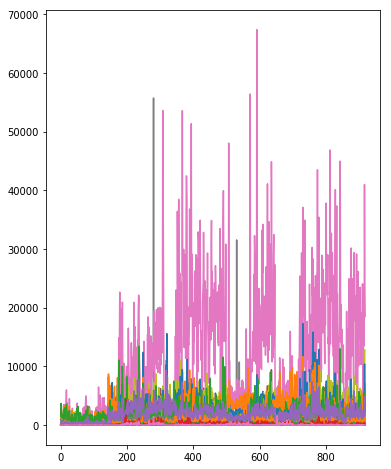

In [11]:
f = pyplot.figure(figsize=(6,8))
ax = f.add_subplot(1,1,1)
for gene_id in mt['gene_id']:
    mt_expression = ad[ad.obs['gene_id'] == gene_id] 
    ax.plot(mt_expression.X, label=gene_id)